In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ダミー個人情報.csv", encoding="utf-8")
df

,名前,ふりがな,アドレス,性別,年齢,誕生日,婚姻,血液型,都道府県,電話番号,携帯,キャリア,カレーの食べ方
0,富永 恵梨香,とみなが えりか,tominaga_erika@example.com,女,76,1943/3/2,既婚,O型,神奈川県,055-456- 74,090-6184-5836,au,左ルー・ルー攻め派
1,岩沢 涼,いわさわ りょう,iwasawa_ryou@example.com,女,70,1949/11/7,既婚,A型,広島県,098-704- 909,080-3742-9620,ドコモ,ぶっかけ・ルー攻め派
2,永瀬 エリカ,ながせ えりか,nagase_erika@example.com,女,33,1987/1/21,既婚,O型,愛媛県,044-132-7989,080-1536-1443,ソフトバンク,左ルー・せき止め派
3,古田 桃子,ふるた ももこ,furuta_momoko@example.com,女,51,1968/6/7,既婚,AB型,北海道,022-265-3240,090-6567-4839,ドコモ,ぶっかけ・混ぜ混ぜ派
4,池内 七世,いけうち ななせ,ikeuchi_nanase@example.com,女,26,1993/4/23,未婚,O型,福岡県,0 6-667-9218,090-6476-8708,au,奥ルー・せき止め派
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ほしの あき,ほしの あき,hoshino_aki@example.com,女,44,1976/1/24,既婚,A型,和歌山県,059-189-2820,090-5093-8700,ドコモ,左ルー・せき止め派
4996,石黒 明日,いしぐろ めいび,ishiguro_meibi@example.com,女,52,1967/11/25,既婚,B型,兵庫県,024-969-8965,090- 882-1284,ソフトバンク,ぶっかけ・ナン派
4997,山内 健,やまのうち けん,yamanouchi_ken@example.com,男,60,1960/1/6,既婚,A型,埼玉県,0 5-943-5714,080-7278-3680,au,ぶっかけ・ルー攻め派
4998,吉永 知史,よしなが ともふみ,yoshinaga_tomofumi@example.com,男,38,1982/1/31,未婚,A型,岐阜県,015-301-1785,090-4779- 744,ドコモ,ぶっかけ・せき止め派


In [3]:
df["電話番号"] = df["電話番号"].str.replace(" ", "0")
df["携帯"] = df["携帯"].str.replace(" ", "0")
df

,名前,ふりがな,アドレス,性別,年齢,誕生日,婚姻,血液型,都道府県,電話番号,携帯,キャリア,カレーの食べ方
0,富永 恵梨香,とみなが えりか,tominaga_erika@example.com,女,76,1943/3/2,既婚,O型,神奈川県,055-456-0074,090-6184-5836,au,左ルー・ルー攻め派
1,岩沢 涼,いわさわ りょう,iwasawa_ryou@example.com,女,70,1949/11/7,既婚,A型,広島県,098-704-0909,080-3742-9620,ドコモ,ぶっかけ・ルー攻め派
2,永瀬 エリカ,ながせ えりか,nagase_erika@example.com,女,33,1987/1/21,既婚,O型,愛媛県,044-132-7989,080-1536-1443,ソフトバンク,左ルー・せき止め派
3,古田 桃子,ふるた ももこ,furuta_momoko@example.com,女,51,1968/6/7,既婚,AB型,北海道,022-265-3240,090-6567-4839,ドコモ,ぶっかけ・混ぜ混ぜ派
4,池内 七世,いけうち ななせ,ikeuchi_nanase@example.com,女,26,1993/4/23,未婚,O型,福岡県,006-667-9218,090-6476-8708,au,奥ルー・せき止め派
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ほしの あき,ほしの あき,hoshino_aki@example.com,女,44,1976/1/24,既婚,A型,和歌山県,059-189-2820,090-5093-8700,ドコモ,左ルー・せき止め派
4996,石黒 明日,いしぐろ めいび,ishiguro_meibi@example.com,女,52,1967/11/25,既婚,B型,兵庫県,024-969-8965,090-0882-1284,ソフトバンク,ぶっかけ・ナン派
4997,山内 健,やまのうち けん,yamanouchi_ken@example.com,男,60,1960/1/6,既婚,A型,埼玉県,005-943-5714,080-7278-3680,au,ぶっかけ・ルー攻め派
4998,吉永 知史,よしなが ともふみ,yoshinaga_tomofumi@example.com,男,38,1982/1/31,未婚,A型,岐阜県,015-301-1785,090-4779-0744,ドコモ,ぶっかけ・せき止め派


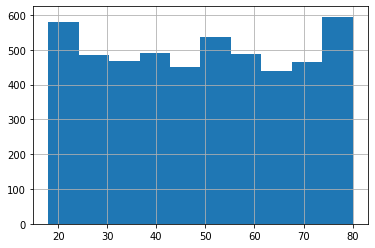

In [4]:
df_age = df["年齢"]
df_age.hist()

C:\Users\Yamashita.Ko\Anaconda3\envs\Jupyter\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12489 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yamashita.Ko\Anaconda3\envs\Jupyter\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yamashita.Ko\Anaconda3\envs\Jupyter\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12514 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yamashita.Ko\Anaconda3\envs\Jupyter\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yamashita.Ko\Anaconda3\envs\Jupyter\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yamashita.Ko\Ana

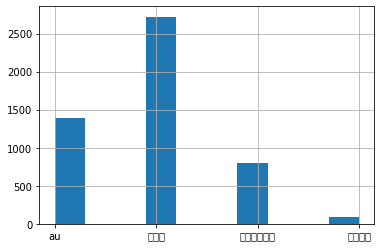

In [45]:
df["キャリア"].hist()

In [5]:
df["キャリア"].unique()

array(['au', 'ドコモ', 'ソフトバンク', 'ツーカー'], dtype=object)

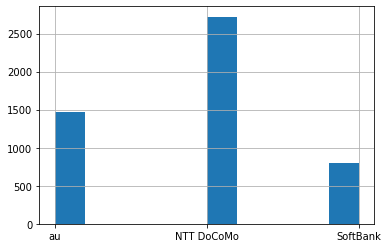

In [6]:
df.loc[df["キャリア"] == "ソフトバンク", ["キャリア"]] = "SoftBank"
df.loc[df["キャリア"] == "ドコモ", ["キャリア"]] = "NTT DoCoMo"
df.loc[df["キャリア"] == "ツーカー", ["キャリア"]] = "au"  # ツーカーは au ということにする
df["キャリア"].hist()

In [7]:
df["ルーの位置"] = df["カレーの食べ方"].str.extract("^(.*)・(.*)$")[0]
df["攻め方"] = df["カレーの食べ方"].str.extract("^(.*)・(.*)$")[1]
df

,名前,ふりがな,アドレス,性別,年齢,誕生日,婚姻,血液型,都道府県,電話番号,携帯,キャリア,カレーの食べ方,ルーの位置,攻め方
0,富永 恵梨香,とみなが えりか,tominaga_erika@example.com,女,76,1943/3/2,既婚,O型,神奈川県,055-456-0074,090-6184-5836,au,左ルー・ルー攻め派,左ルー,ルー攻め派
1,岩沢 涼,いわさわ りょう,iwasawa_ryou@example.com,女,70,1949/11/7,既婚,A型,広島県,098-704-0909,080-3742-9620,NTT DoCoMo,ぶっかけ・ルー攻め派,ぶっかけ,ルー攻め派
2,永瀬 エリカ,ながせ えりか,nagase_erika@example.com,女,33,1987/1/21,既婚,O型,愛媛県,044-132-7989,080-1536-1443,SoftBank,左ルー・せき止め派,左ルー,せき止め派
3,古田 桃子,ふるた ももこ,furuta_momoko@example.com,女,51,1968/6/7,既婚,AB型,北海道,022-265-3240,090-6567-4839,NTT DoCoMo,ぶっかけ・混ぜ混ぜ派,ぶっかけ,混ぜ混ぜ派
4,池内 七世,いけうち ななせ,ikeuchi_nanase@example.com,女,26,1993/4/23,未婚,O型,福岡県,006-667-9218,090-6476-8708,au,奥ルー・せき止め派,奥ルー,せき止め派
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ほしの あき,ほしの あき,hoshino_aki@example.com,女,44,1976/1/24,既婚,A型,和歌山県,059-189-2820,090-5093-8700,NTT DoCoMo,左ルー・せき止め派,左ルー,せき止め派
4996,石黒 明日,いしぐろ めいび,ishiguro_meibi@example.com,女,52,1967/11/25,既婚,B型,兵庫県,024-969-8965,090-0882-1284,SoftBank,ぶっかけ・ナン派,ぶっかけ,ナン派
4997,山内 健,やまのうち けん,yamanouchi_ken@example.com,男,60,1960/1/6,既婚,A型,埼玉県,005-943-5714,080-7278-3680,au,ぶっかけ・ルー攻め派,ぶっかけ,ルー攻め派
4998,吉永 知史,よしなが ともふみ,yoshinaga_tomofumi@example.com,男,38,1982/1/31,未婚,A型,岐阜県,015-301-1785,090-4779-0744,NTT DoCoMo,ぶっかけ・せき止め派,ぶっかけ,せき止め派


In [8]:
df["ルーの位置"].unique()

array(['左ルー', 'ぶっかけ', '奥ルー', '右ルー', '別盛り', '手前ルー'], dtype=object)

In [9]:
df["攻め方"].unique()

array(['ルー攻め派', 'せき止め派', '混ぜ混ぜ派', 'ナン派', '別口派'], dtype=object)

In [10]:
bin = [10, 20, 30, 40, 50, 60, 70, 80, 100]
lab = ["10代", "20代", "30代", "40代", "50代", "60代", "70代", "80代以上"]
df["世代"] = pd.cut(df["年齢"], bins=bin, right=False, labels=lab)
df

,名前,ふりがな,アドレス,性別,年齢,誕生日,婚姻,血液型,都道府県,電話番号,携帯,キャリア,カレーの食べ方,ルーの位置,攻め方,世代
0,富永 恵梨香,とみなが えりか,tominaga_erika@example.com,女,76,1943/3/2,既婚,O型,神奈川県,055-456-0074,090-6184-5836,au,左ルー・ルー攻め派,左ルー,ルー攻め派,70代
1,岩沢 涼,いわさわ りょう,iwasawa_ryou@example.com,女,70,1949/11/7,既婚,A型,広島県,098-704-0909,080-3742-9620,NTT DoCoMo,ぶっかけ・ルー攻め派,ぶっかけ,ルー攻め派,70代
2,永瀬 エリカ,ながせ えりか,nagase_erika@example.com,女,33,1987/1/21,既婚,O型,愛媛県,044-132-7989,080-1536-1443,SoftBank,左ルー・せき止め派,左ルー,せき止め派,30代
3,古田 桃子,ふるた ももこ,furuta_momoko@example.com,女,51,1968/6/7,既婚,AB型,北海道,022-265-3240,090-6567-4839,NTT DoCoMo,ぶっかけ・混ぜ混ぜ派,ぶっかけ,混ぜ混ぜ派,50代
4,池内 七世,いけうち ななせ,ikeuchi_nanase@example.com,女,26,1993/4/23,未婚,O型,福岡県,006-667-9218,090-6476-8708,au,奥ルー・せき止め派,奥ルー,せき止め派,20代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ほしの あき,ほしの あき,hoshino_aki@example.com,女,44,1976/1/24,既婚,A型,和歌山県,059-189-2820,090-5093-8700,NTT DoCoMo,左ルー・せき止め派,左ルー,せき止め派,40代
4996,石黒 明日,いしぐろ めいび,ishiguro_meibi@example.com,女,52,1967/11/25,既婚,B型,兵庫県,024-969-8965,090-0882-1284,SoftBank,ぶっかけ・ナン派,ぶっかけ,ナン派,50代
4997,山内 健,やまのうち けん,yamanouchi_ken@example.com,男,60,1960/1/6,既婚,A型,埼玉県,005-943-5714,080-7278-3680,au,ぶっかけ・ルー攻め派,ぶっかけ,ルー攻め派,60代
4998,吉永 知史,よしなが ともふみ,yoshinaga_tomofumi@example.com,男,38,1982/1/31,未婚,A型,岐阜県,015-301-1785,090-4779-0744,NTT DoCoMo,ぶっかけ・せき止め派,ぶっかけ,せき止め派,30代


In [54]:
df[df["世代"] == "10代"]

,名前,ふりがな,アドレス,性別,年齢,誕生日,婚姻,血液型,都道府県,電話番号,携帯,キャリア,カレーの食べ方,ルーの位置,攻め方,世代
29,岩瀬 淳,いわせ あつし,iwase_atsushi@example.com,男,18,2001/4/29,未婚,A型,大阪府,029-923- 212,080-7501-3503,NTT DoCoMo,右ルー・別口派,右ルー,別口派,10代
53,庄司 莉央,しょうじ りお,shouji_rio@example.com,女,19,2000/12/29,未婚,O型,東京都,077- 98-7248,080-6814-6243,NTT DoCoMo,ぶっかけ・混ぜ混ぜ派,ぶっかけ,混ぜ混ぜ派,10代
70,小沢 剛基,おざわ よしき,ozawa_yoshiki@example.com,男,18,2001/9/25,未婚,O型,山口県,073-613-1198,080-8682-1898,au,右ルー・ルー攻め派,右ルー,ルー攻め派,10代
134,石倉 悟志,いしくら さとし,ishikura_satoshi@example.com,男,18,2001/4/8,未婚,A型,長崎県,083-781-8732,090-7435-2280,NTT DoCoMo,左ルー・ルー攻め派,左ルー,ルー攻め派,10代
152,石塚 恵梨香,いしづか えりか,ishiduka_erika@example.com,女,19,2000/6/18,既婚,O型,長野県,083-406-4587,080- 96-2509,SoftBank,左ルー・ルー攻め派,左ルー,ルー攻め派,10代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,さだ 祐基,さだ ゆうき,sada_yuuki@example.com,男,18,2001/7/31,未婚,O型,福岡県,048-222-2934,090-8567-4777,NTT DoCoMo,ぶっかけ・ナン派,ぶっかけ,ナン派,10代
4838,永山 祐基,ながやま ゆうき,nagayama_yuuki@example.com,男,18,2002/1/17,未婚,O型,三重県,073-325-4190,090-4920-3531,au,別盛り・ナン派,別盛り,ナン派,10代
4896,宇野 雅彦,うの まさひこ,uno_masahiko@example.com,男,18,2001/12/23,未婚,O型,沖縄県,066-110-7655,090-6336-9790,NTT DoCoMo,ぶっかけ・せき止め派,ぶっかけ,せき止め派,10代
4940,大竹 知世,おおたけ ちせ,ootake_chise@example.com,女,19,2000/9/25,未婚,A型,北海道,0 3-760-9407,080-4817-3204,SoftBank,手前ルー・混ぜ混ぜ派,手前ルー,混ぜ混ぜ派,10代


In [55]:
df[df["世代"] == "70代"]

,名前,ふりがな,アドレス,性別,年齢,誕生日,婚姻,血液型,都道府県,電話番号,携帯,キャリア,カレーの食べ方,ルーの位置,攻め方,世代
0,富永 恵梨香,とみなが えりか,tominaga_erika@example.com,女,76,1943/3/2,既婚,O型,神奈川県,055-456- 74,090-6184-5836,au,左ルー・ルー攻め派,左ルー,ルー攻め派,70代
1,岩沢 涼,いわさわ りょう,iwasawa_ryou@example.com,女,70,1949/11/7,既婚,A型,広島県,098-704- 909,080-3742-9620,NTT DoCoMo,ぶっかけ・ルー攻め派,ぶっかけ,ルー攻め派,70代
6,和泉 和香,わいずみ わか,waizumi_waka@example.com,女,75,1944/8/1,既婚,B型,京都府,075-670-6321,080-3522-8048,au,ぶっかけ・混ぜ混ぜ派,ぶっかけ,混ぜ混ぜ派,70代
8,高野 小百合,たかの さゆり,takano_sayuri@example.com,女,72,1947/5/6,既婚,A型,沖縄県,045-911-4750,090- 296-6011,SoftBank,ぶっかけ・ルー攻め派,ぶっかけ,ルー攻め派,70代
13,阪本 あや子,さかもと あやこ,sakamoto_ayako@example.com,女,79,1940/8/7,既婚,O型,広島県,074-606-5525,080- 317-3814,au,左ルー・せき止め派,左ルー,せき止め派,70代
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,吉井 知世,よしい ちせ,yoshii_chise@example.com,女,75,1944/12/10,既婚,AB型,北海道,010-187-5464,080- 670-8306,au,ぶっかけ・せき止め派,ぶっかけ,せき止め派,70代
4982,日下 太朗,ひのした たろう,hinoshita_tarou@example.com,男,77,1942/4/17,既婚,AB型,広島県,069-472-3382,090- 645-2655,NTT DoCoMo,左ルー・ルー攻め派,左ルー,ルー攻め派,70代
4983,栗田 恵梨香,くりた えりか,kurita_erika@example.com,女,71,1948/7/16,既婚,O型,福井県,015-629-3129,090-7653-8270,SoftBank,手前ルー・せき止め派,手前ルー,せき止め派,70代
4985,小栗 理紗,おぐり りさ,oguri_risa@example.com,女,72,1947/8/28,既婚,B型,大阪府,040-474-4003,080-9446-1790,au,ぶっかけ・ルー攻め派,ぶっかけ,ルー攻め派,70代


In [34]:
import numpy as np

df_ = df.copy()

In [35]:
def to_be_uncontracted(gen):
    prob = {"10代": 0.70, "20代": 0.98, "30代": 0.98, "40代": 0.97, "50代": 0.95, "60代": 0.89, "70代": 0.83, "80代以上": 0.74}
    if np.random.rand() <= 1-prob[gen]:
        return True
    else:
        return False

In [36]:
df_["契約見直し"] = df_["世代"].map(to_be_uncontracted)

In [37]:
df_.loc[df_["契約見直し"], ["キャリア"]] = "no_contract"

In [38]:
df_

,名前,ふりがな,アドレス,性別,年齢,誕生日,婚姻,血液型,都道府県,電話番号,携帯,キャリア,カレーの食べ方,ルーの位置,攻め方,世代,契約見直し
0,富永 恵梨香,とみなが えりか,tominaga_erika@example.com,女,76,1943/3/2,既婚,O型,神奈川県,055-456-0074,090-6184-5836,au,左ルー・ルー攻め派,左ルー,ルー攻め派,70代,False
1,岩沢 涼,いわさわ りょう,iwasawa_ryou@example.com,女,70,1949/11/7,既婚,A型,広島県,098-704-0909,080-3742-9620,NTT DoCoMo,ぶっかけ・ルー攻め派,ぶっかけ,ルー攻め派,70代,False
2,永瀬 エリカ,ながせ えりか,nagase_erika@example.com,女,33,1987/1/21,既婚,O型,愛媛県,044-132-7989,080-1536-1443,SoftBank,左ルー・せき止め派,左ルー,せき止め派,30代,False
3,古田 桃子,ふるた ももこ,furuta_momoko@example.com,女,51,1968/6/7,既婚,AB型,北海道,022-265-3240,090-6567-4839,NTT DoCoMo,ぶっかけ・混ぜ混ぜ派,ぶっかけ,混ぜ混ぜ派,50代,False
4,池内 七世,いけうち ななせ,ikeuchi_nanase@example.com,女,26,1993/4/23,未婚,O型,福岡県,006-667-9218,090-6476-8708,au,奥ルー・せき止め派,奥ルー,せき止め派,20代,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ほしの あき,ほしの あき,hoshino_aki@example.com,女,44,1976/1/24,既婚,A型,和歌山県,059-189-2820,090-5093-8700,NTT DoCoMo,左ルー・せき止め派,左ルー,せき止め派,40代,False
4996,石黒 明日,いしぐろ めいび,ishiguro_meibi@example.com,女,52,1967/11/25,既婚,B型,兵庫県,024-969-8965,090-0882-1284,SoftBank,ぶっかけ・ナン派,ぶっかけ,ナン派,50代,False
4997,山内 健,やまのうち けん,yamanouchi_ken@example.com,男,60,1960/1/6,既婚,A型,埼玉県,005-943-5714,080-7278-3680,au,ぶっかけ・ルー攻め派,ぶっかけ,ルー攻め派,60代,False
4998,吉永 知史,よしなが ともふみ,yoshinaga_tomofumi@example.com,男,38,1982/1/31,未婚,A型,岐阜県,015-301-1785,090-4779-0744,NTT DoCoMo,ぶっかけ・せき止め派,ぶっかけ,せき止め派,30代,False


In [71]:
df[df["世代"]==False]

,名前,ふりがな,アドレス,性別,年齢,誕生日,婚姻,血液型,都道府県,電話番号,携帯,キャリア,カレーの食べ方,ルーの位置,攻め方,世代


In [53]:
df_[df_["契約見直し"]]

,名前,ふりがな,アドレス,性別,年齢,誕生日,婚姻,血液型,都道府県,電話番号,携帯,キャリア,カレーの食べ方,ルーの位置,攻め方,世代,契約見直し
29,岩瀬 淳,いわせ あつし,iwase_atsushi@example.com,男,18,2001/4/29,未婚,A型,大阪府,029-923-0212,080-7501-3503,no_contract,右ルー・別口派,右ルー,別口派,10代,True
53,庄司 莉央,しょうじ りお,shouji_rio@example.com,女,19,2000/12/29,未婚,O型,東京都,077-098-7248,080-6814-6243,no_contract,ぶっかけ・混ぜ混ぜ派,ぶっかけ,混ぜ混ぜ派,10代,True
70,小沢 剛基,おざわ よしき,ozawa_yoshiki@example.com,男,18,2001/9/25,未婚,O型,山口県,073-613-1198,080-8682-1898,no_contract,右ルー・ルー攻め派,右ルー,ルー攻め派,10代,True
134,石倉 悟志,いしくら さとし,ishikura_satoshi@example.com,男,18,2001/4/8,未婚,A型,長崎県,083-781-8732,090-7435-2280,no_contract,左ルー・ルー攻め派,左ルー,ルー攻め派,10代,True
152,石塚 恵梨香,いしづか えりか,ishiduka_erika@example.com,女,19,2000/6/18,既婚,O型,長野県,083-406-4587,080-0096-2509,no_contract,左ルー・ルー攻め派,左ルー,ルー攻め派,10代,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,さだ 祐基,さだ ゆうき,sada_yuuki@example.com,男,18,2001/7/31,未婚,O型,福岡県,048-222-2934,090-8567-4777,no_contract,ぶっかけ・ナン派,ぶっかけ,ナン派,10代,True
4838,永山 祐基,ながやま ゆうき,nagayama_yuuki@example.com,男,18,2002/1/17,未婚,O型,三重県,073-325-4190,090-4920-3531,no_contract,別盛り・ナン派,別盛り,ナン派,10代,True
4896,宇野 雅彦,うの まさひこ,uno_masahiko@example.com,男,18,2001/12/23,未婚,O型,沖縄県,066-110-7655,090-6336-9790,no_contract,ぶっかけ・せき止め派,ぶっかけ,せき止め派,10代,True
4940,大竹 知世,おおたけ ちせ,ootake_chise@example.com,女,19,2000/9/25,未婚,A型,北海道,003-760-9407,080-4817-3204,no_contract,手前ルー・混ぜ混ぜ派,手前ルー,混ぜ混ぜ派,10代,True


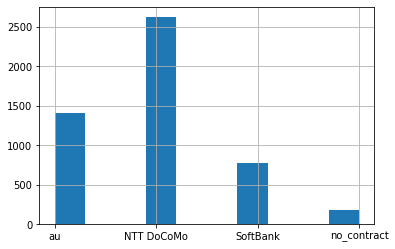

In [52]:
df_["キャリア"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001824D74B248>]],
      dtype=object)

C:\Users\Yamashita.Ko\Anaconda3\envs\Jupyter\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yamashita.Ko\Anaconda3\envs\Jupyter\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40802 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yamashita.Ko\Anaconda3\envs\Jupyter\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yamashita.Ko\Anaconda3\envs\Jupyter\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40802 missing from current font.
  font.set_text(s, 0, flags=flags)


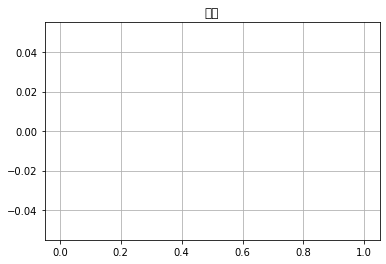

In [51]:
df_[df["キャリア"]=="no_contract"].hist()